In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge, Lasso, ElasticNet, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn import datasets

# Linear Regression



## The Normal Equation

Create the dataset with the equation $4 + 3x + \text{Gaussian Noise}$

In [ ]:
x = 2 * np.random.rand(100, 1)
y = 4 + 3 * x + np.random.randn(100, 1)

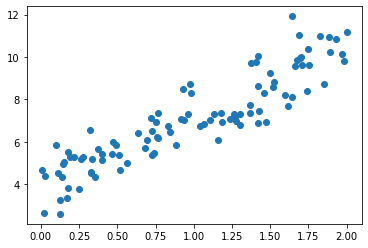

In [ ]:
plt.scatter(x, y)
plt.show()

Obtain the value of $\theta$ using the normal equation $\hat{\theta} = (X^{\top}X)^{-1} X^\top y$


In [ ]:
x_b = np.c_[np.ones((100, 1)), x]
theta_best = np.linalg.inv(x_b.T @ x_b) @ x_b.T @ y

theta_best

array([[3.89836984],
       [3.21973702]])

Predict new values based on theta best found in the previous block


In [ ]:
x_new = np.array([[0], [2]])
x_new_b = np.c_[np.ones((2, 1)), x_new]

y_predict = x_new_b @ theta_best
y_predict

array([[ 3.89836984],
       [10.33784388]])

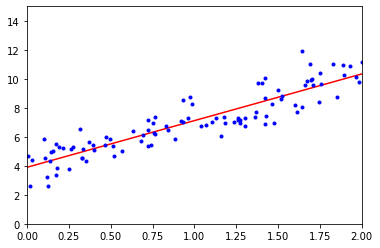

In [ ]:
plt.plot(x_new, y_predict, 'r-')
plt.plot(x, y, 'b.')
plt.axis([0, 2, 0, 15])
plt.show()

Use sklearn.linear_model.LinearRegression to predict values with x_new

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x, y)

print(f'The values of theta are: Intercept {lin_reg.intercept_} and Coefficient {lin_reg.coef_}')

The values of theta are: Intercept [3.89836984] and Coefficient [[3.21973702]]


In [ ]:
lin_reg.predict(x_new)

array([[ 3.89836984],
       [10.33784388]])

# Gradient Descent

## Batch Gradient Descent

Partial derivatives of the cost function:
$$ \frac{\partial}{\partial\theta_j}MSE(\theta)=\frac{2}{m}\sum_{i=1}^{m}{(\theta^{\top}x^{(i)}-y^{(i)})x^{(i)}_j} $$

Gradiendt vector of the cost function:
$$\nabla_{\theta}MSE(\theta)=\frac{2}{m}X^{\top}(X\theta-y)$$

Gradient Descent step:
$$\theta^{(\text{Next Step})} = \theta - \eta\nabla_{\theta}MSE(\theta)$$

In [ ]:
eta = 0.1
n_iterations = 1000
m = 100

theta = np.random.randn(2,1)

for iteration in range(n_iterations):
  gradients = 2/m * x_b.T @ (x_b @ theta - y)
  theta = theta - eta * gradients

print(f'The values of theta are {theta}')

The values of theta are [[3.89836984]
 [3.21973702]]


## Stochastic Gradient Descent

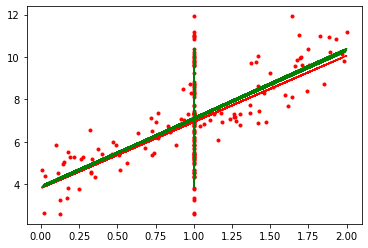

The values of theta are [[3.85344115]
 [3.23763154]]


In [ ]:
n_epochs = 50
t0, t1 = 5, 50

def learning_schedule(t):
  return t0 / (t + t1)

theta = np.random.randn(2,1)

plt.plot(x_b, y, 'r.')

for epoch in range(n_epochs):
  
  for i in range(m):
    
    random_index = np.random.randint(m)
    xi = x_b[random_index:random_index + 1]
    yi = y[random_index:random_index + 1]
    gradients = 2 * xi.T @ (xi @ theta - yi)
    eta = learning_schedule(epoch * m + i)
    theta = theta - eta * gradients

  if epoch == 0:
    plt.plot(x_b, (x_b@theta), 'r--')
  elif epoch == n_epochs:
    plt.plot(x_b, (x_b@theta), 'b-')
  elif epoch % 10 == 0:
    plt.plot(x_b, (x_b@theta), 'g--')

plt.show()
print(f'The values of theta are {theta}')

In [ ]:
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_reg.fit(x_b, y.ravel())

print(f'The values found with the SGDRegressor are: \n\tIntercept: {sgd_reg.intercept_} \n\tCoefficients: {sgd_reg.coef_}')

The values found with the SGDRegressor are: 
	Intercept: [1.93641767] 
	Coefficients: [1.93641767 3.13567092]


# Polynomial Regression

Generating nonlinear data using quadratic equation:

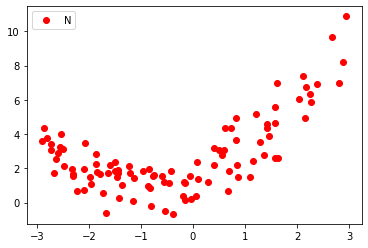

In [ ]:
m = 100
x = 6 * np.random.rand(m, 1) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m, 1)

plt.plot(x, y, 'ro')
plt.legend('Nonlinear quadratic data')
plt.show()

First we implement the preprocessing step of applying a polynomial features to x

In [ ]:
poly_features = PolynomialFeatures(degree=2, include_bias=False)
x_poly = poly_features.fit_transform(x)

print(f'The original value of x is {x[0]} and the new polynomial x is {x_poly[0]}')

The original value of x is [-2.46872053] and the new polynomial x is [-2.46872053  6.09458104]


Then, we process the $x$ with polynomial features using the linear regressor.

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(x_poly, y)

print(f'The values of the parameters are: \n\tIntercept: {lin_reg.intercept_}\n\tCoefficients: {lin_reg.coef_}')

The values of the parameters are: 
	Intercept: [1.46488067]
	Coefficients: [[0.980135   0.58199118]]


Let's plot the original data vs predicted data

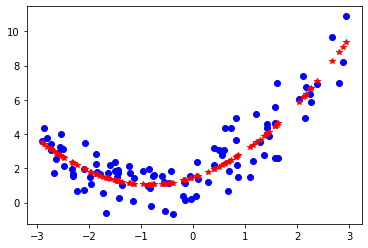

In [ ]:
y_hat = lin_reg.predict(x_poly)

plt.plot(x, y, 'bo')
plt.plot(x, y_hat, 'r*')

plt.show()

# Learning Curves

These are the plots of the model's performance on the training set and the validation set as a function of the training set size (or the trainint iteration)

In [ ]:
def plot_learning_curves(model, x, y):

  x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.2)
  train_errors, val_errors = [], []

  for m in range(1, len(x_train)):
    
    model.fit(x_train[:m], y_train[:m])
    y_train_predict = model.predict(x_train[:m])
    y_val_predict = model.predict(x_val)
    train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
    val_errors.append(mean_squared_error(y_val, y_val_predict))
  
  plt.plot(np.sqrt(train_errors), 'r-+', linewidth=2, label='Train')
  plt.plot(np.sqrt(val_errors), 'b-', linewidth=2, label='Validation')
  plt.legend()
  plt.axis([0, 80, 0, 5])
  plt.show()

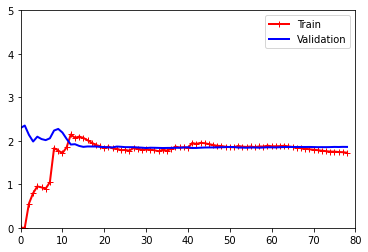

In [ ]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, x, y)

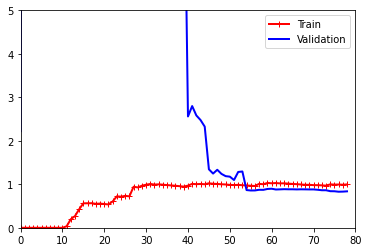

In [ ]:
polynomial_regression = Pipeline([
    ('poly_features', PolynomialFeatures(degree=10, include_bias=False)),
    ('lin_reg', LinearRegression())
])

plot_learning_curves(polynomial_regression, x, y)

# Regularized Linear Models

## Ridge Regression (L2)

Ridge Regression cost function:
> $J(\theta)=MSE(\theta)+\underbrace{\alpha\frac{1}{2}\sum_{i=1}^{n}{\theta_{i}^{2}}}_\text{Ridge regularization}$

Ridge Regression closed-form solution:
> $\hat{\theta}=(X^{\intercal}X+\underbrace{\alpha A}_{\text{Ridge Regularization}})^{-1}X^\top y$

In [ ]:
ridge_reg = Ridge(alpha=1, solver='cholesky')
ridge_reg.fit(x, y)
ridge_reg.predict([[1.5]])

array([[4.17557651]])

In [ ]:
sgd_reg = SGDRegressor(penalty='l2')
sgd_reg.fit(x, y.ravel())
sgd_reg.predict([[1.5]])

array([4.17328264])

## Lasso Regression (L1)

Lasso Regression cost function:
>$J(\theta)=MSE(\theta)+\underbrace{\alpha\sum_{i=1}^{n}{|\theta_{i}|}}_\text{Lasso regularization}$

In [ ]:
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(x, y)
lasso_reg.predict([[1.5]])

array([4.11069961])

In [ ]:
sgd_reg_lasso = SGDRegressor(penalty='l1')
sgd_reg_lasso.fit(x, y.ravel())
sgd_reg_lasso.predict([[1.5]])

array([4.12234488])

## Elastic Net

Elastic Net cost function:
>$J(\theta)=MSE(\theta)+\underbrace{r\alpha\sum_{i=1}^{n}{|\theta_{i}|}}_\text{Lasso Regularization}+\overbrace{\frac{1-r}{2}\alpha\sum_{i=1}^{n}{\theta_{i}^{2}}}^\text{Ridge Regularization}$

In [ ]:
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(x, y)
elastic_net.predict([[1.5]])

array([4.11944385])

## Early Stopping


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2) 
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2) 


# Create a pipeline to prepare the data
poly_scaler = Pipeline([
    ('poly_features', PolynomialFeatures(degree=90, include_bias=False)),
    ('std_scaler', StandardScaler())
])

# Transform the data
x_train_poly_scaled = poly_scaler.fit_transform(x_train)
x_val_poly_scaled = poly_scaler.transform(x_val)

# Create the model
sgd_reg = SGDRegressor(max_iter=1, tol=-np.infty, warm_start=True,
                       penalty=None, learning_rate='constant', eta0=0.0005)

# Apply the early stopping
minimum_val_error = float('inf')
best_epoch = None
best_model = None

for epoch in range(1000):
  sgd_reg.fit(x_train_poly_scaled, y_train.ravel())
  y_val_predict = sgd_reg.predict(x_val_poly_scaled)
  val_error = mean_squared_error(y_val, y_val_predict)

  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

print(f'The best epoch is {best_epoch}')
print(f'The best model is {best_model}')

The best epoch is 460
The best model is SGDRegressor(alpha=0.0001, average=False, early_stopping=False, epsilon=0.1,
             eta0=0.0005, fit_intercept=True, l1_ratio=0.15,
             learning_rate='constant', loss='squared_loss', max_iter=1,
             n_iter_no_change=5, penalty=None, power_t=0.25, random_state=None,
             shuffle=True, tol=-inf, validation_fraction=0.1, verbose=0,
             warm_start=True)


# Logistic Regression

The Logistic Regression is a binary classifier. Computes a weighted sun of the input features, but it outputs the logistic of this result.

## Estimating Probabilities

Logistic Regression model estimated probability (vectorized form):
>$\hat{p}=h_{\theta}(x)=\underbrace{\sigma(x^{\intercal}\theta)}_\text{Sigmoid function}$

The logistic function is:
>$\sigma(t)=\frac{1}{1+exp(-t)}$

Logistic Regression model prediction:
>$\hat{y}=\begin{cases}{0 \text{ if } \hat{p}<0.5}\\{{1 \text{ if }\hat{p}\ge0.5}}\end{cases}$

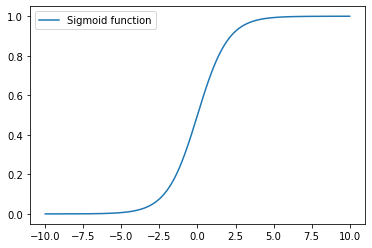

In [ ]:
# Logistic Regression 
x = np.linspace(-10, 10, 1000)
y = 1 / (1 + np.exp(-x))

plt.plot(x, y, label='Sigmoid function')
plt.legend()
plt.show()

## Training and Cost Function

Cost function of a single training instance:
>$c(\theta)=\begin{cases}{-log(\hat{p})}&{\text{if }y=1}\\{-log(1-\hat{p})}&{\text{if }y=0}\end{cases}$

Logistic Regression cost function (log loss):
>$J(\theta)=-\frac{1}{m}\sum_{i=1}^{m}{\lbrack y^{(i)}log(\hat{p}^{(i)})+(1-y^{(i)})log(1-\hat{p}^{(i)}) \rbrack}$

Logistic cost function partial derivatives:
>$\frac{\partial}{\partial\theta_{j}}J(\theta)= \frac{1}{m} \sum_{i=1}^{m}{( \sigma(\theta^{\intercal}x^{(i)}) - y^{(i)}) x_{j}^{(i)}}$

## Decision Boundaries

In [ ]:
# Load the data
iris = datasets.load_iris()
x = iris['data'][:, 3:]
y = (iris['target'] == 2).astype(np.int)

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(x, y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

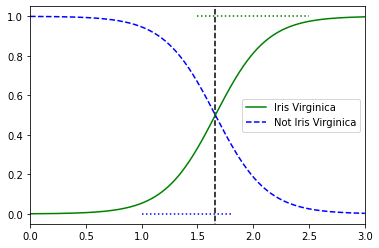

In [ ]:
x_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(x_new)
plt.plot(x_new, y_proba[:, 1], 'g-', label='Iris Virginica')
plt.plot(x_new, y_proba[:, 0], 'b--', label='Not Iris Virginica')
plt.vlines(1.66, -1, 2, colors='k', linestyles='dashed')
plt.hlines(1, 1.5, 2.5, colors='green', linestyles='dotted')
plt.axis([0, 3, -0.05, 1.05])
plt.hlines(0, 1.0, 1.8, colors='blue', linestyles='dotted')
plt.legend()
plt.show()

## Softmax Regression

The Softmax regression is a multinomial logistic regression, that means that the model can estimate the probability of multiple classes and return the class with the highest probability.

- Softmax score for class $k$:
> $s_{k}=x^{\intercal}\theta^{(k)}$

- Softmax function
> $\hat{P}_{k} = \sigma(s(x))_{k} = \frac{exp(s_{k}(x))}{\sum_{j=1}^{K}exp(s_{j}(x))}$
>- $K$ is the number of classes
>- $s(x)$ is a vector containing the scores of each class for the instance $x$
>- $\sigma(s(x))_{k}$ is the estimated probability that the instance $x$ belongs to class $k$

- Softmax Regression classifier prediction:
> $\hat{y} = \underset{k}{\arg\max}\sigma(s(x))_{k} = \underset{k}{\arg\max}s_{k}(x) = \underset{k}{\arg\max}((\theta^{(k)})^{\intercal}x)$

- Cross entropy cost function
>$J(\Theta)= -\frac{1}{m} \sum_{i=1}^{m}{ \sum_{i=1}^{K}{ y_{k}^{(i)}log(\hat{P_{k}}^{(i)}) } }$
> - $y_{k}^{(i)}$ is the target probability that the $i^{th}$ instance belongs to class $k$.

- Cross entropy gradient vector for class $k$:
> $\nabla_{\theta^{(k)}}J(\Theta) = \frac{1}{m}\sum_{i=1}^{m}{(\hat{P}_{k}^{(i)} - y_{k}^{(i)})x^{(i)}}$

In [ ]:
x = iris['data'][:, (2,3)]
y = iris['target']

softmax_reg = LogisticRegression(multi_class='multinomial', solver='lbfgs', C=10)
softmax_reg.fit(x, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='multinomial', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
softmax_reg.predict([[1.7, 1.5], [1.5, 1.7]])

array([0, 0])

# Exercises

1. **Which Linear Regression training algorithm can you use if you have a training set with millions of features?**

> When n (number of features) is really high, the best option is using a Gradient Descent algorithm. The most efficient is using SGD (Stochastic Gradient Descent) since it is faster than Batch Gradient Descent when the number of instances is very large.

2. **Suppose the features in your training set have very different scales. Which algorithms might suffer from this, and how? What can you do about it?**

> When the features have different scales, algorithms of Gradient Descent suffer since these algorithms may have incoveniences converging or may not converge at all to an optimal solution. The solution is to standardize the data (e.g. using StandardScaler from Scikit-Learn) to make sure the algorithm converges to an optimal solution.

3. **Can Gradient Descent get stuck in a local minimum when training a Logistic
Regression model?**

> The cost function for algorithms of Logistic Regression is the *log loss* that happens to be a convex function. This garantees that the Gradient Descent will find a global minimum when optimizing. Therefore, it is not possible to get stuck in a local minimum since only has one global minimum.

4. **Do all Gradient Descent algorithms lead to the same model, provided you let
them run long enough?**

> Yes, all the Gradient Descent algorithms will lead to similar models. 

5. **Suppose you use Batch Gradient Descent and you plot the validation error at
every epoch. If you notice that the validation error consistently goes up, what is likely going on? How can you fix this?**

> It is likely that the issues has to do with the learning rate set for the algorithm. When the learning rate is very large, is possible that Gradient Descent diverges instead of converging. The solution would be to set a lower learning rate. 

6. **Is it a good idea to stop Mini-batch Gradient Descent immediately when the validation error goes up?**

> No, since it is possible that this error goes down after some iterations. The optimal way to avoid this happening is to set a early stopping function that evaluates if the error has been growing for some iterations before stoppint the Mini-Batch Gradient Descent


7. **Which Gradient Descent algorithm (among those we discussed) will reach the
vicinity of the optimal solution the fastest? Which will actually converge? How
can you make the others converge as well?**

> The algorithm that will converge is the Batch Gradient Descent. This is the algorithm that will converge at less iterations as well. In order to make converge the Stochastic and the Mini-Batch GD as well, we need to use a learning schedule function that reduces the learning rate as the iterations increases to avoid these algorithms jumping around not converging or diverging.

8. **Suppose you are using Polynomial Regression. You plot the learning curves and you notice that there is a large gap between the training error and the validation error. What is happening? What are three ways to solve this?**

> The algorithm is overfitting the training data. The first way to avoid this is reducing degrees of the algorithm to avoid this overfitting. The second way to avoid this is regularizing the model to penalyze the less usefull features in the model. Lastly, other option would be increasing the training data to allow our model to generalize better.


9. **Suppose you are using Ridge Regression and you notice that the training error and the validation error are almost equal and fairly high. Would you say that the model suffers from high bias or high variance? Should you increase the regularization hyperparameter α or reduce it?**

> If the error on both cases are high, then the model is suffering from high bias, that means that it is underfitting. In order to give more freedom and avoid this high bias, we should decrease the regularization of the model.

10. **Why would you want to use:**
- **Ridge Regression instead of plain Linear Regression (i.e., without any regularization)?**
- **Lasso instead of Ridge Regression?**
- **Elastic Net instead of Lasso?**

> - In general it is recommended use at least a little of regularization than plain Linear Regression, so in every scenario using Ridge Regression is suggested.
> - When we believe that only some features are useful for the model.
> - Generally it is more recommended to use ElasticNet than Lasso, since Lasso performs worst when the number of features is higher than the number of instances.

11. **Suppose you want to classify pictures as outdoor/indoor and daytime/nighttime. Should you implement two Logistic Regression classifiers or one Softmax Regression classifier?**

> Softmax regression classifier is a multinomial classifier (that is, takes several classes) but is not a multioutput classifier. In this case would be preferrable to use two Logistic Regression Classifiers for this problem.

12. **Implement Batch Gradient Descent with early stopping for Softmax Regression (without using Scikit-Learn).**